# Trabajo Práctico N°2: Predicción de lluvia en Australia

Integrantes: Sebastian Palacio, Juana Chies Doumecq

#### Contexto  
El presente trabajo práctico se centra en el desarrollo de un modelo de predicción meteorológica utilizando técnicas de Machine Learning. El propósito principal es determinar, a partir de datos climáticos históricos de distintas ciudades de Australia, si lloverá o no al día siguiente. Para ello se emplea el dataset weatherAUS.csv, el cual contiene registros de los últimos diez años con variables como temperatura, humedad, presión atmosférica, dirección y velocidad del viento, entre otras, además de la variable objetivo ‘RainTomorrow’, que indica si al día siguiente se registró lluvia.

### Variables del conjunto de datos  

**Variables explicativas:**  
- Date
- Location
- MinTemp
- MaxTemp
- Rainfall
- Evaporation
- Sunshine
- WindGustDir
- WindGustSpeed
- WindDir9am
- WindDir3pm
- WindSpeed9am
- WindSpeed3pm
- Humidity9am
- Humidity3pm
- Pressure9am
- Pressure3pm
- Cloud9am
- Cloud3pm
- Temp9am
- Temp3pm
- RainToday
- Latitude
- Longitude
- Region

**Variable objetivo (target):**  
- RainTomorrow

## TP2

In [272]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.colors as mcolors
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [273]:
df = pd.read_csv("weatherAUS.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [274]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## Entrega número 1

### Clusterización de ciudades

In [275]:
# Coordenadas de las ciudades

#locations = df['Location'].unique()
coordenadas = {
    'Albury': (-36.0737, 146.9135),
    'BadgerysCreek': (-33.8833, 150.7333),
    'Cobar': (-31.4958, 145.8386),
    'CoffsHarbour': (-30.2963, 153.1139),
    'Moree': (-29.4628, 149.8419),
    'Newcastle': (-32.9283, 151.7817),
    'NorahHead': (-33.2817, 151.5714),
    'NorfolkIsland': (-29.0408, 167.9547),
    'Penrith': (-33.7511, 150.6942),
    'Richmond': (-33.6000, 150.7500),
    'Sydney': (-33.8688, 151.2093),
    'SydneyAirport': (-33.9461, 151.1772),
    'WaggaWagga': (-35.1082, 147.3598),
    'Williamtown': (-32.8156, 151.8431),
    'Wollongong': (-34.4278, 150.8931),
    'Canberra': (-35.2809, 149.1300),
    'Tuggeranong': (-35.4244, 149.0878),
    'MountGinini': (-35.5297, 148.7731),
    'Ballarat': (-37.5622, 143.8503),
    'Bendigo': (-36.7570, 144.2794),
    'Sale': (-38.1069, 147.0664),
    'MelbourneAirport': (-37.6690, 144.8410),
    'Melbourne': (-37.8136, 144.9631),
    'Mildura': (-34.1872, 142.1386),
    'Nhil': (-36.3319, 141.6503),
    'Portland': (-38.3453, 141.6044),
    'Watsonia': (-37.7111, 145.0831),
    'Dartmoor': (-37.9217, 141.2711),
    'Brisbane': (-27.4698, 153.0251),
    'Cairns': (-16.9186, 145.7781),
    'GoldCoast': (-28.0167, 153.4000),
    'Townsville': (-19.2590, 146.8169),
    'Adelaide': (-34.9285, 138.6007),
    'MountGambier': (-37.8297, 140.7828),
    'Nuriootpa': (-34.4667, 138.9833),
    'Woomera': (-31.1558, 136.8269),
    'Albany': (-35.0269, 117.8842),
    'Witchcliffe': (-34.0278, 115.1006),
    'PearceRAAF': (-31.6678, 116.0150),
    'PerthAirport': (-31.9403, 115.9672),
    'Perth': (-31.9505, 115.8605),
    'SalmonGums': (-32.9833, 121.6333),
    'Walpole': (-34.9778, 116.7333),
    'Hobart': (-42.8821, 147.3272),
    'Launceston': (-41.4332, 147.1441),
    'AliceSprings': (-23.6980, 133.8807),
    'Darwin': (-12.4634, 130.8456),
    'Katherine': (-14.4653, 132.2636),
    'Uluru': (-25.3444, 131.0369)
}

coord_ciudades = pd.DataFrame([
    {'Location': ciudad, 'Latitude': coords[0], 'Longitude': coords[1]}
    for ciudad, coords in coordenadas.items()
])

coord_ciudades.head()

,Location,Latitude,Longitude
0,Albury,-36.0737,146.9135
1,BadgerysCreek,-33.8833,150.7333
2,Cobar,-31.4958,145.8386
3,CoffsHarbour,-30.2963,153.1139
4,Moree,-29.4628,149.8419


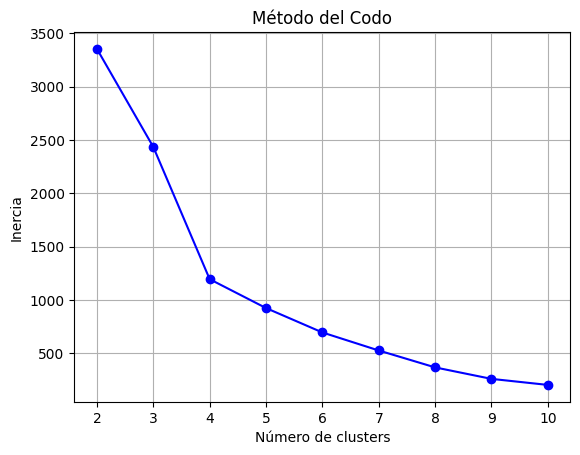

In [276]:
X = coord_ciudades[['Latitude', 'Longitude']].values
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Graficar
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.grid(True)
plt.show()

In [277]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
coord_ciudades['Region'] = kmeans.fit_predict(X)

unique_regions = coord_ciudades['Region'].unique()
num_colors = len(unique_regions)
color_palette = plt.get_cmap('tab10', num_colors)
region_color_map = {str(region): mcolors.to_hex(color_palette(i)) 
                    for i, region in enumerate(sorted(unique_regions))}

fig = px.scatter(coord_ciudades, 
                 x='Longitude', 
                 y='Latitude', 
                 color='Region',
                 labels={'Longitude': 'Longitud', 
                         'Latitude': 'Latitud',
                         'Region': 'Región'},
                 color_discrete_map=region_color_map,
                 title=f'Clustering con K-means')

fig.update_traces(marker=dict(size=10))
fig.show()

In [278]:
print(coord_ciudades.groupby('Region')['Location'].count())
coord_ciudades.head()

Region
0    19
1     7
2    17
3     6
Name: Location, dtype: int64


,Location,Latitude,Longitude,Region
0,Albury,-36.0737,146.9135,0
1,BadgerysCreek,-33.8833,150.7333,2
2,Cobar,-31.4958,145.8386,0
3,CoffsHarbour,-30.2963,153.1139,2
4,Moree,-29.4628,149.8419,2


In [279]:
df = df.merge(coord_ciudades, on='Location', how='left')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitude,Longitude,Region
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,-36.0737,146.9135,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,-36.0737,146.9135,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,-36.0737,146.9135,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,-36.0737,146.9135,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,-36.0737,146.9135,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1020.3,NaN,NaN,10.1,22.4,No,No,-25.3444,131.0369,3
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1019.1,NaN,NaN,10.9,24.5,No,No,-25.3444,131.0369,3
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1016.8,NaN,NaN,12.5,26.1,No,No,-25.3444,131.0369,3
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,1016.5,3.0,2.0,15.1,26.0,No,No,-25.3444,131.0369,3


In [280]:
df['Date'] = pd.to_datetime(df['Date'])
warnings.filterwarnings("ignore")

In [281]:
print(df.columns.tolist())

['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Latitude', 'Longitude', 'Region']


### Análisis descriptivo

**División cruzada train - test**

In [282]:
# Imputamos la variable RainTomorrow antes de dividir el dataset ya que no puede haber nulos en esta variable
# Decidimos esto ya que es la variable a predecir.
df['RainTomorrow_from_next'] = df.groupby('Location')['RainToday'].shift(-1)
df.loc[df['RainTomorrow'].isna(), 'RainTomorrow'] = \
    df.loc[df['RainTomorrow'].isna(), 'RainTomorrow_from_next']
df = df.drop('RainTomorrow_from_next', axis=1)

#Eliminamos las filas que no pudieron ser impuitadas de ninguna forma
print('Fueron borrados', df['RainTomorrow'].isna().sum(), 'datos')
df = df[df['RainTomorrow'].notna()].reset_index(drop=True)

Fueron borrados 3267 datos


In [283]:
# Dividir en X e y
X = df.drop(columns='RainTomorrow')
y = df['RainTomorrow']

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Mantener proporción de clases
)

print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

Train size: 113754
Test size: 28439


**Análisis y decisión sobre datos faltantes**

In [284]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

filas_antes_train = len(train)
filas_antes_test = len(test)

Rainfall


In [285]:
#Creamos la columna Rainfall_temp temporal para almacenar la media regional del día
train['Rainfall_temp'] = train.groupby(['Region', 'Date'])['Rainfall'].transform(lambda x: x.fillna(x.mean()))

#Si RainToday = 'No', Rainfall = 0
train.loc[train['RainToday'] == 'No', 'Rainfall'] = train.loc[train['RainToday'] == 'No', 'Rainfall'].fillna(0)

#Si RainToday = 'Yes' o nulo, usar media regional diaria
train.loc[train['Rainfall'].isna() & ((train['RainToday'] == 'Yes') | (train['RainToday'].isna())), 'Rainfall'] = \
    train.loc[train['Rainfall'].isna() & ((train['RainToday'] == 'Yes') | (train['RainToday'].isna())), 'Rainfall_temp']

#Si RainToday = 'Yes' y la media regional diaria = 0 → forzar a 1 mm
train.loc[(train['RainToday'] == 'Yes') & (train['Rainfall'] == 0), 'Rainfall'] = 1

#Eliminamos la columna temporal
train.drop('Rainfall_temp', axis=1, inplace=True)

In [286]:
#Creamos la columna Rainfall_temp temporal para almacenar la media regional del día
test['Rainfall_temp'] = test.groupby(['Region', 'Date'])['Rainfall'].transform(lambda x: x.fillna(x.mean()))

#Si RainToday = 'No', Rainfall = 0
test.loc[test['RainToday'] == 'No', 'Rainfall'] = test.loc[test['RainToday'] == 'No', 'Rainfall'].fillna(0)

#Si RainToday = 'Yes' o nulo, usar media regional diaria
test.loc[test['Rainfall'].isna() & ((test['RainToday'] == 'Yes') | (test['RainToday'].isna())), 'Rainfall'] = \
    test.loc[test['Rainfall'].isna() & ((test['RainToday'] == 'Yes') | (test['RainToday'].isna())), 'Rainfall_temp']

#Si RainToday = 'Yes' y la media regional diaria = 0 → forzar a 1 mm
test.loc[(test['RainToday'] == 'Yes') & (test['Rainfall'] == 0), 'Rainfall'] = 1

#Eliminamos la columna temporal
test.drop('Rainfall_temp', axis=1, inplace=True)

RainToday


In [287]:
#Imputamos RainToday con Rainfall>1mm en el mismo lugar y día
train['RainToday'] = (train['Rainfall'] > 1).map({True: 'Yes', False: 'No'})

#Los datos que no pudieron ser imputados, son borrados
print('Fueron borrados', train['Rainfall'].isna().sum(), 'datos')
train = train.dropna(subset=['Rainfall'])

Fueron borrados 0 datos


In [288]:
#Imputamos RainToday con Rainfall>1mm en el mismo lugar y día
test['RainToday'] = (test['Rainfall'] > 1).map({True: 'Yes', False: 'No'})

#Los datos que no pudieron ser imputados, son borrados
print('Fueron borrados', test['Rainfall'].isna().sum(), 'datos')
test = test.dropna(subset=['Rainfall'])

Fueron borrados 25 datos


WindGustDir, WindDir9am, WindDir3pm

In [289]:
#Variables Categóricas (WindGustDir, WindDir9am, WindDir3pm) fueron imputadas por moda por región y por date
for col in ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']:
    train[col] = train.groupby(['Region', 'Date'])[col].transform(
        lambda x: x.fillna(x.median())
    )
#Los datos que no pudieron ser imputados, son borrados
print('Fueron borrados', train['WindGustSpeed'].isna().sum()+train['WindSpeed9am'].isna().sum()+train['WindSpeed3pm'].isna().sum(), 'datos')
train = train.dropna(subset=['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'])

Fueron borrados 36 datos


In [290]:
#Variables Categóricas (WindGustDir, WindDir9am, WindDir3pm) fueron imputadas por moda por región y por date
for col in ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']:
    test[col] = test.groupby(['Region', 'Date'])[col].transform(
        lambda x: x.fillna(x.median())
    )
#Los datos que no pudieron ser imputados, son borrados
print('Fueron borrados', test['WindGustSpeed'].isna().sum()+test['WindSpeed9am'].isna().sum()+test['WindSpeed3pm'].isna().sum(), 'datos')
test = test.dropna(subset=['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'])

Fueron borrados 397 datos


Pressure9am, Pressure3pm

In [291]:
#Variables Numéricas - Presión Atmosférica (Pressure9am, Pressure3pm) fueron imputadas según Mediana por Región y Date
for col in ['Pressure9am', 'Pressure3pm']:
    train[col] = train.groupby(['Region', 'Date'])[col].transform(
        lambda x: x.fillna(x.median())
    )
#Los datos que no pudieron ser imputados, son borrados
print('Fueron borrados', train['Pressure9am'].isna().sum()+train['Pressure3pm'].isna().sum(), 'datos')
train = train.dropna(subset=['Pressure9am', 'Pressure3pm'])

Fueron borrados 0 datos


In [292]:
#Variables Numéricas - Presión Atmosférica (Pressure9am, Pressure3pm) fueron imputadas según Mediana por Región y Date
for col in ['Pressure9am', 'Pressure3pm']:
    test[col] = test.groupby(['Region', 'Date'])[col].transform(
        lambda x: x.fillna(x.median())
    )
#Los datos que no pudieron ser imputados, son borrados
print('Fueron borrados', test['Pressure9am'].isna().sum()+test['Pressure3pm'].isna().sum(), 'datos')
test = test.dropna(subset=['Pressure9am', 'Pressure3pm'])

Fueron borrados 583 datos


MinTemp, MaxTemp, Temp9am, Temp3pm

In [293]:
#Variables Numéricas - Temperaturas (MinTemp, MaxTemp, Temp9am, Temp3pm) fueron imputadas por date y la media de su región

# Imputar con media por Region y Date
for col in ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']:
    train[col] = train.groupby(['Region', 'Date'])[col].transform(
        lambda x: x.fillna(x.mean())
    )
    
#Los datos que no pudieron ser imputados, son borrados
print('Fueron borrados', train['MinTemp'].isna().sum()+train['MaxTemp'].isna().sum()+train['Temp9am'].isna().sum()+train['Temp3pm'].isna().sum(), 'datos')
train = train.dropna(subset=['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm'])

Fueron borrados 1 datos


In [294]:
#Variables Numéricas - Temperaturas (MinTemp, MaxTemp, Temp9am, Temp3pm) fueron imputadas por date y la media de su región

# Imputar con media por Region y Date
for col in ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']:
    test[col] = test.groupby(['Region', 'Date'])[col].transform(
        lambda x: x.fillna(x.mean())
    )
    
#Los datos que no pudieron ser imputados, son borrados
print('Fueron borrados', test['MinTemp'].isna().sum()+test['MaxTemp'].isna().sum()+test['Temp9am'].isna().sum()+test['Temp3pm'].isna().sum(), 'datos')
test = test.dropna(subset=['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm'])

Fueron borrados 54 datos


Humidity9am, Humidity3pm

In [295]:
#Variables Numéricas - Humedad (Humidity9am, Humidity3pm) imputadas por mediana región y date
for col in ['Humidity9am', 'Humidity3pm']:
    train[col] = train.groupby(['Region', 'Date'])[col].transform(
        lambda x: x.fillna(x.median())
    )

#Los datos que no pudieron ser imputados, son borrados
print('Fueron borrados', train['Humidity9am'].isna().sum()+train['Humidity3pm'].isna().sum(), 'datos')
train = train.dropna(subset=['Humidity9am', 'Humidity3pm'])

Fueron borrados 5 datos


In [296]:
#Variables Numéricas - Humedad (Humidity9am, Humidity3pm) imputadas por mediana región y date
for col in ['Humidity9am', 'Humidity3pm']:
    test[col] = test.groupby(['Region', 'Date'])[col].transform(
        lambda x: x.fillna(x.median())
    )

#Los datos que no pudieron ser imputados, son borrados
print('Fueron borrados', test['Humidity9am'].isna().sum()+test['Humidity3pm'].isna().sum(), 'datos')
test = test.dropna(subset=['Humidity9am', 'Humidity3pm'])

Fueron borrados 48 datos


WindGustSpeed, WindSpeed9am y WindSpeed3pm

In [297]:
#WindGustSpeed, WindSpeed9am y WindSpeed3pm fueron imputadas por mediana en la región
for col in ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']:
    train[col] = train.groupby('Region')[col].transform(
        lambda x: x.fillna(x.median())
    )
#Los datos que no pudieron ser imputados, son borrados
print('Fueron borrados', train['WindGustSpeed'].isna().sum()+train['WindSpeed9am'].isna().sum()+train['WindSpeed3pm'].isna().sum(), 'datos')
train = train.dropna(subset=['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'])

Fueron borrados 0 datos


In [298]:
#WindGustSpeed, WindSpeed9am y WindSpeed3pm fueron imputadas por mediana en la región
for col in ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']:
    test[col] = test.groupby('Region')[col].transform(
        lambda x: x.fillna(x.median())
    )
#Los datos que no pudieron ser imputados, son borrados
print('Fueron borrados', test['WindGustSpeed'].isna().sum()+test['WindSpeed9am'].isna().sum()+test['WindSpeed3pm'].isna().sum(), 'datos')
test = test.dropna(subset=['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'])

Fueron borrados 0 datos


Cloud9am, Cloud3pm

In [299]:
#Variables Numéricas - Nubosidad (Cloud9am, Cloud3pm) imputadas por mediana de región y date
for col in ['Cloud9am', 'Cloud3pm']:
    train[col] = train.groupby(['Region', 'Date'])[col].transform(
        lambda x: x.fillna(x.median())
    )

#Los datos que no pudieron ser imputados, son borrados
print('Fueron borrados', train['Cloud9am'].isna().sum()+train['Cloud3pm'].isna().sum(), 'datos')
train = train.dropna(subset=['Cloud9am', 'Cloud3pm'])

Fueron borrados 277 datos


In [300]:
#Variables Numéricas - Nubosidad (Cloud9am, Cloud3pm) imputadas por mediana de región y date
for col in ['Cloud9am', 'Cloud3pm']:
    test[col] = test.groupby(['Region', 'Date'])[col].transform(
        lambda x: x.fillna(x.median())
    )

#Los datos que no pudieron ser imputados, son borrados
print('Fueron borrados', test['Cloud9am'].isna().sum()+test['Cloud3pm'].isna().sum(), 'datos')
test = test.dropna(subset=['Cloud9am', 'Cloud3pm'])

Fueron borrados 4105 datos


Evaporation

In [301]:
#Variable Numérica - Evaporación (Evaporation) fue imputada por la Mediana por región y date
train['Evaporation'] = train.groupby(['Region', 'Date'])['Evaporation'].transform(
    lambda x: x.fillna(x.median())
)
#Los datos que no pudieron ser imputados, son borrados
print('Fueron borrados', train['Evaporation'].isna().sum(), 'datos')
train = train.dropna(subset=['Evaporation'])

Fueron borrados 85 datos


In [302]:
#Variable Numérica - Evaporación (Evaporation) fue imputada por la Mediana por región y date
test['Evaporation'] = test.groupby(['Region', 'Date'])['Evaporation'].transform(
    lambda x: x.fillna(x.median())
)
#Los datos que no pudieron ser imputados, son borrados
print('Fueron borrados', test['Evaporation'].isna().sum(), 'datos')
test = test.dropna(subset=['Evaporation'])

Fueron borrados 1113 datos


Direcciones de Viento (WindGustDir, WindDir9am, WindDir3pm)

In [303]:
#Variables Categóricas - Direcciones de Viento (WindGustDir, WindDir9am, WindDir3pm) fueron imputadas por Moda por región y date
for col in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    train[col] = train.groupby(['Region', 'Date'])[col].transform(
        lambda x: x.fillna(x.mode()[0] if len(x.mode()) > 0 else x.iloc[0])
    )
    
#Los datos que no pudieron ser imputados, son borrados
print('Fueron borrados', train['WindGustDir'].isna().sum()+train['WindDir9am'].isna().sum()+train['WindDir3pm'].isna().sum(), 'datos')
train = train.dropna(subset=['WindGustDir', 'WindDir9am', 'WindDir3pm'])

Fueron borrados 18 datos


In [304]:
#Variables Categóricas - Direcciones de Viento (WindGustDir, WindDir9am, WindDir3pm) fueron imputadas por Moda por región y date
for col in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    test[col] = test.groupby(['Region', 'Date'])[col].transform(
        lambda x: x.fillna(x.mode()[0] if len(x.mode()) > 0 else x.iloc[0])
    )
    
#Los datos que no pudieron ser imputados, son borrados
print('Fueron borrados', test['WindGustDir'].isna().sum()+test['WindDir9am'].isna().sum()+test['WindDir3pm'].isna().sum(), 'datos')
test = test.dropna(subset=['WindGustDir', 'WindDir9am', 'WindDir3pm'])

Fueron borrados 71 datos


Sunshine

In [305]:
#Variables Numéricas - Duración de Sol (Sunshine) fue imputada por la Mediana por región y date
train['Sunshine'] = train.groupby(['Region', 'Date'])['Sunshine'].transform(
    lambda x: x.fillna(x.median())
)
#Los datos que no pudieron ser imputados, son borrados
print('Fueron borrados', train['Sunshine'].isna().sum(), 'datos')
train = train.dropna(subset=['Sunshine'])

Fueron borrados 280 datos


In [306]:
#Variables Numéricas - Duración de Sol (Sunshine) fue imputada por la Mediana por región y date
test['Sunshine'] = test.groupby(['Region', 'Date'])['Sunshine'].transform(
    lambda x: x.fillna(x.median())
)
#Los datos que no pudieron ser imputados, son borrados
print('Fueron borrados', test['Sunshine'].isna().sum(), 'datos')
test = test.dropna(subset=['Sunshine'])

Fueron borrados 708 datos


Total

In [307]:
print(train.isnull().sum())
print(test.isnull().sum())

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Latitude         0
Longitude        0
Region           0
RainTomorrow     0
dtype: int64
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Latitude         0
Longitude        0
Region           0
RainTomorrow     0

In [308]:
filas_despues_train = len(train)
print('Cantidad total de filas eliminadas de train: ', filas_antes_train - filas_despues_train)

filas_despues_test = len(test)
print('Cantidad total de filas eliminadas de test: ', filas_antes_test - filas_despues_test)

Cantidad total de filas eliminadas de train:  633
Cantidad total de filas eliminadas de test:  5084


**División y elección de variables importantes**

In [309]:
# reconstruir X,y desde train/test (post-imputaciones)
X_train = train.drop(columns=['RainTomorrow']).reset_index(drop=True)
X_test  = test.drop(columns=['RainTomorrow']).reset_index(drop=True)
y_train = train['RainTomorrow'].reset_index(drop=True)
y_test  = test['RainTomorrow'].reset_index(drop=True)

cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
        'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
        'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
        'Temp9am', 'Temp3pm', 'RainToday', 'Region']

X_train = X_train[cols]
X_test  = X_test[cols]

**Visualización de datos**

In [310]:
show = X_train[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
                'Temp3pm']].copy()

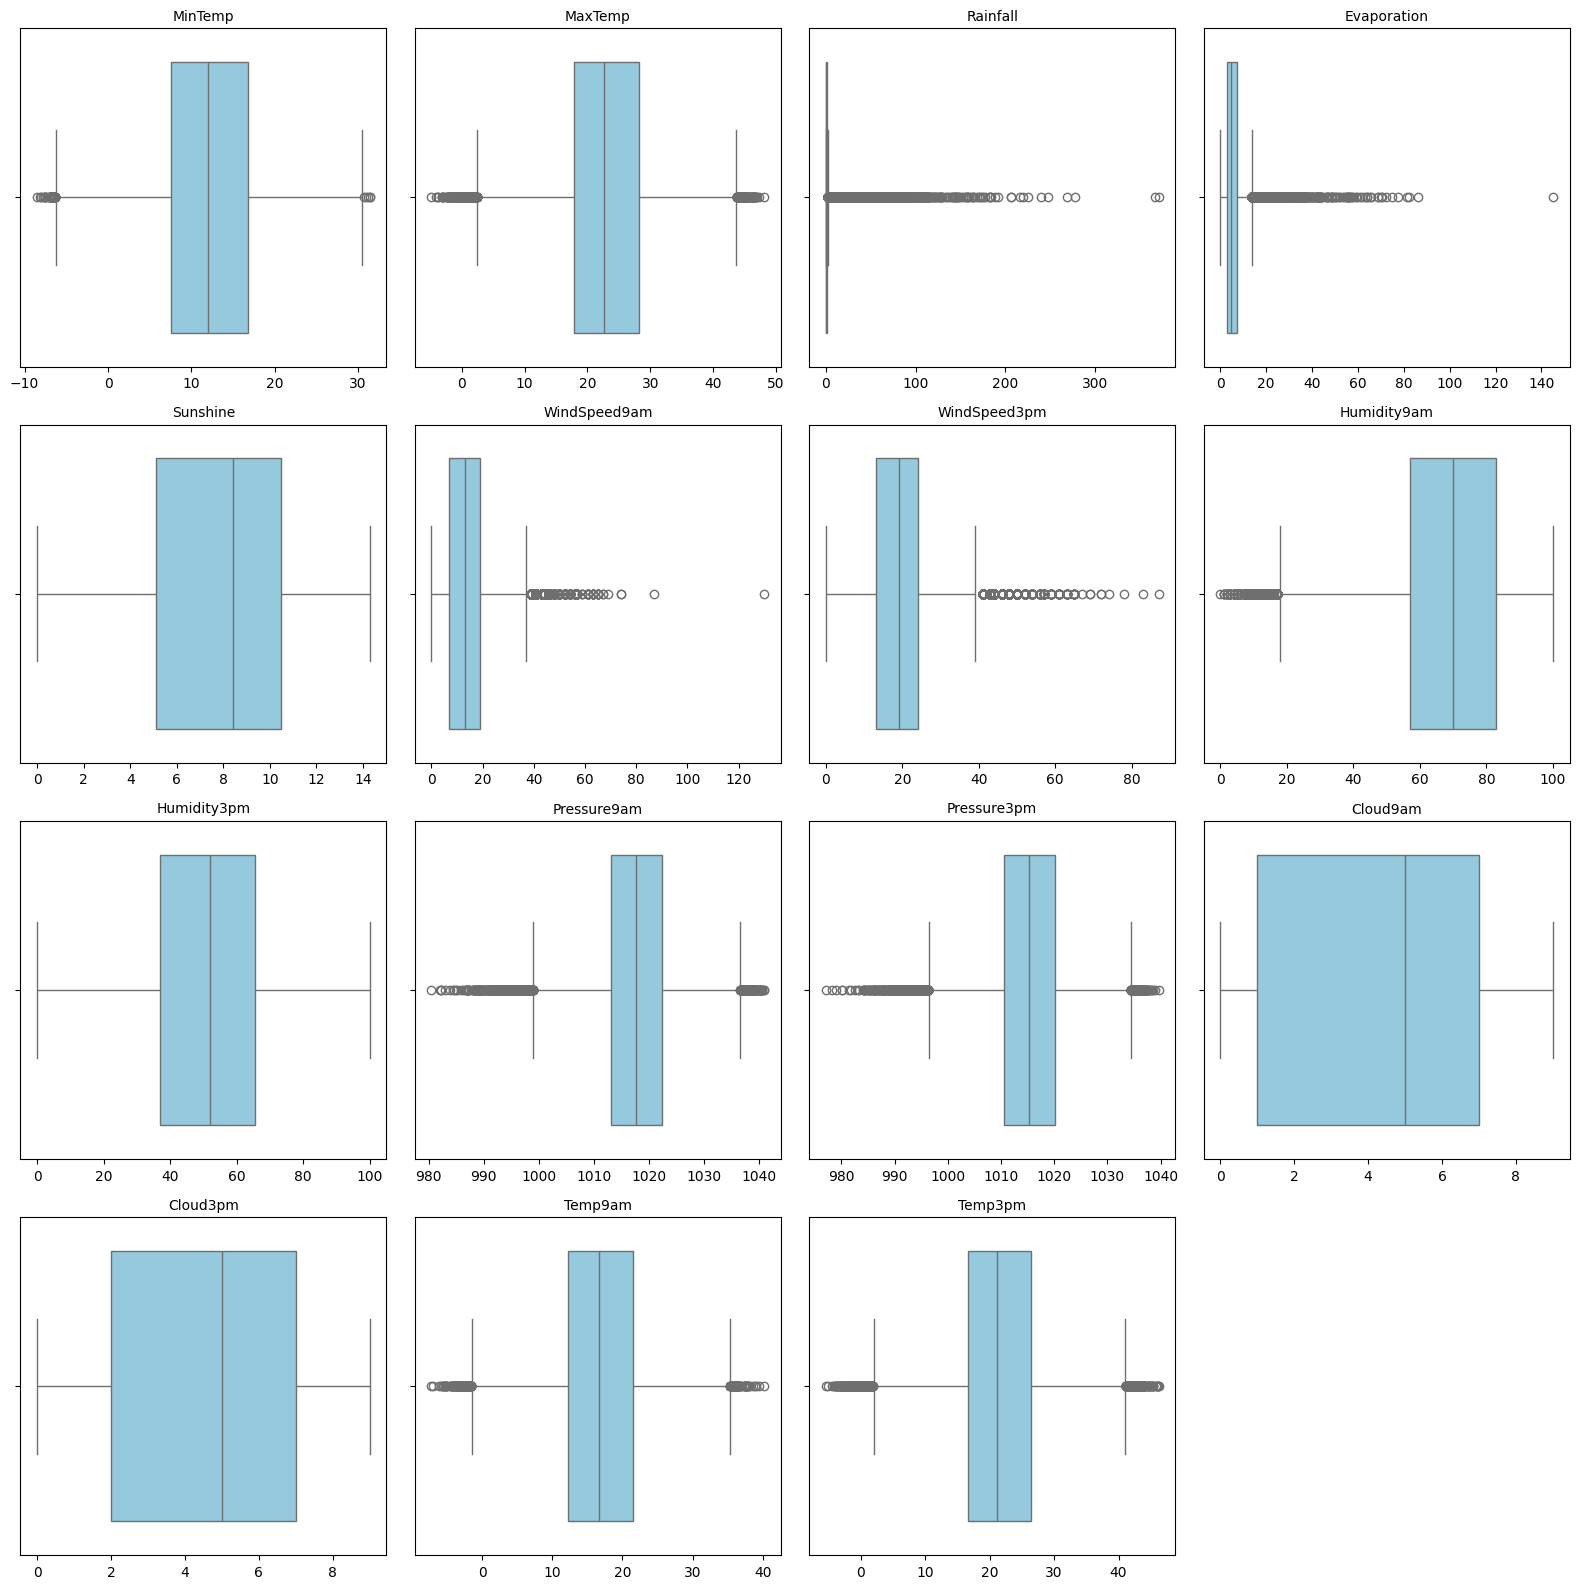

In [311]:
cols = 4
num_vars = len(show.columns)
rows = (num_vars + cols - 1) // cols

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 4*rows))
axes = axes.flatten()

for i, var in enumerate(show.columns):
    sns.boxplot(data=show, x=var, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{var}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

El conjunto de datos, visualizado a través de los diagramas de caja (boxplots), muestra que la mayoría de las variables, incluyendo Rainfall, Evaporation, Sunshine, y las de Viento y Presión, exhiben una distribución altamente asimétrica y presentan una cantidad significativa de valores atípicos (outliers). Por otro lado, variables como MinTemp, MaxTemp y Humedad tienen distribuciones más simétricas o agrupadas, aunque también contienen atípicos en los extremos.

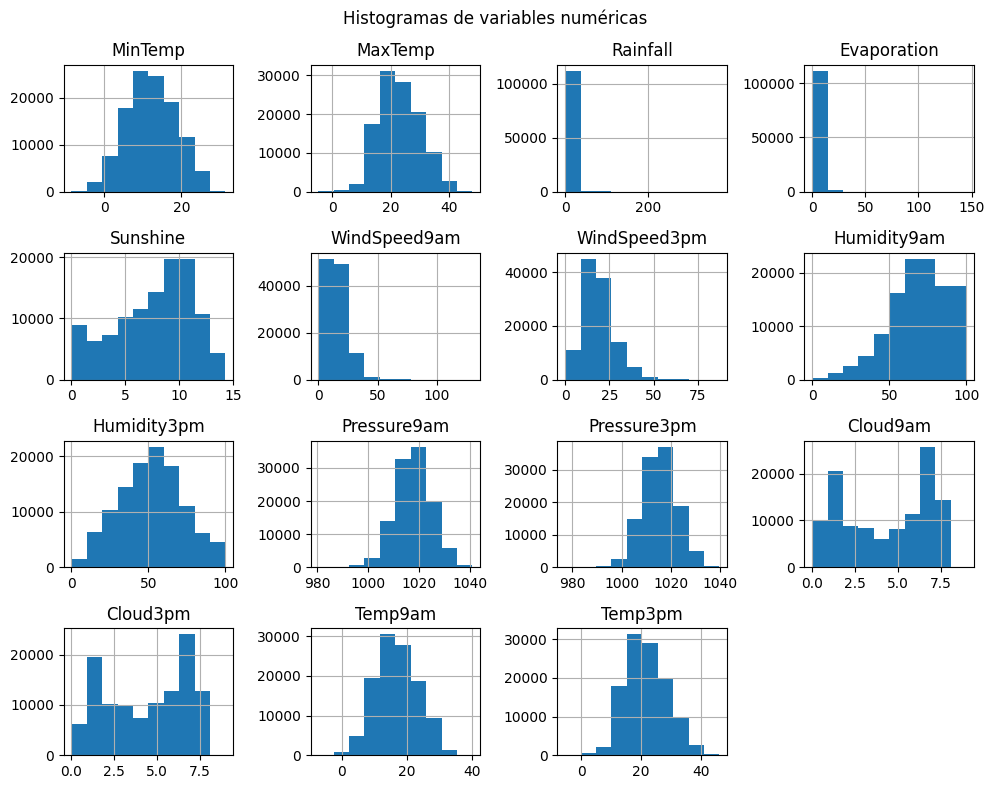

In [312]:
show.hist(figsize=(10,8))
plt.suptitle("Histogramas de variables numéricas")
plt.tight_layout()
plt.show()

Los histogramas confirman una diversidad de formas de distribución entre las variables numéricas. La mayoría de las variables relacionadas con el clima (Rainfall, Evaporation, WindSpeed) muestran una fuerte asimetría positiva (sesgo a la derecha), con valores concentrados cerca de cero, indicando muchos días con poca o nula ocurrencia. En contraste, las variables de Temperatura (MinTemp, MaxTemp, Temp9am, Temp3pm) y Presión presentan distribuciones más cercanas a la normal (o ligeramente sesgadas), mientras que las de Humedad tienden a un sesgo negativo o son más uniformes.

In [313]:
# sns.pairplot(show)
# plt.title('Scatterplot entre variables')
# plt.show()

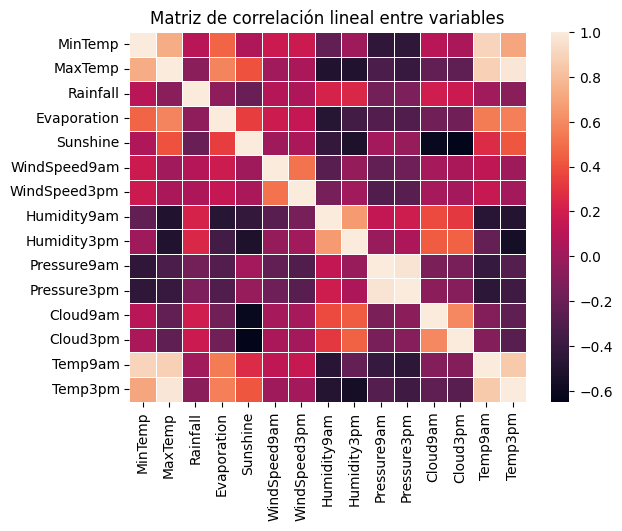

In [314]:
corrmat = show.corr()

sns.heatmap(corrmat, vmax=1, linewidths=.5)
plt.title('Matriz de correlación lineal entre variables')
plt.show()

La matriz de correlación lineal revela varias relaciones significativas entre las variables. Existe una correlación positiva muy fuerte entre las variables medidas en la mañana y la tarde, como Temp9am y Temp3pm, MinTemp y MaxTemp, y Cloud9am y Cloud3pm. También se observa una fuerte correlación negativa entre la Presión de la mañana y la tarde con la Temperatura. Además, Sunshine (horas de sol) y Cloud9am/Cloud3pm (nubosidad) también presentan correlación negativa entre ellas. Por último, la Rainfall (precipitación) muestra correlaciones positivas débiles con variables de humedad y nubosidad, mientras que la mayoría de las demás variables mantienen correlaciones débiles o nulas entre sí.

**Codificación de variables categóricas**

In [315]:
X_train['RainToday'] = X_train['RainToday'].map({'No': 0, 'Yes': 1})
X_test['RainToday']  = X_test['RainToday'].map({'No': 0, 'Yes': 1})

In [316]:
y_train = y_train.map({'No':0, 'Yes':1})
y_test  = y_test.map({'No':0, 'Yes':1})

In [317]:
X_all = pd.concat([X_train, X_test], axis=0)
X_all = pd.get_dummies(X_all, drop_first=True)

X_train = X_all.iloc[:len(X_train), :].reset_index(drop=True)
X_test  = X_all.iloc[len(X_train): , :].reset_index(drop=True)

**Estandarización/escalado de datos.**

In [318]:
# Estandarizar todas las columnas (ya son todas numéricas)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Regresión logística

Debido a que el dataset no esta balanceado, se utiliza class_weight='balanced' para dar mayor peso a la clase minoritaria ("lluvia") y evitar que el modelo se sesgue hacia la predicción de la clase mayoritaria (no lluvia)

In [319]:
# Entrenar regresión logística
model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred = y_pred.ravel()

In [325]:
pred_test = pd.DataFrame({
    'Predicciones': y_pred,
    'Valores': y_test.reset_index(drop=True)
})

pred_test

,Predicciones,Valores
0,1,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
23350,1,1
23351,0,0
23352,0,1
23353,0,0


**Métricas del modelo**

In [321]:
accuracy_logreg = accuracy_score(y_test, y_pred)

classification_report_logreg = classification_report(y_test, y_pred)

print("Métricas para logreg:")
print(f'Accuracy: {accuracy_logreg}')
print("Reporte de clasificación:")
print(classification_report_logreg)

Métricas para logreg:
Accuracy: 0.7963177049882252
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     18142
           1       0.53      0.79      0.63      5213

    accuracy                           0.80     23355
   macro avg       0.73      0.79      0.75     23355
weighted avg       0.84      0.80      0.81     23355



Este modelo presenta un accuracy general del 79.8%, lo cual indica un buen rendimiento general. Sin embargo, el modelo se desempeña mejor en la tarea de detectar las lluvias (recall de 80%), a costa de la precisión (53%), lo que implica que el modelo genera un número considerable de falsos positivos

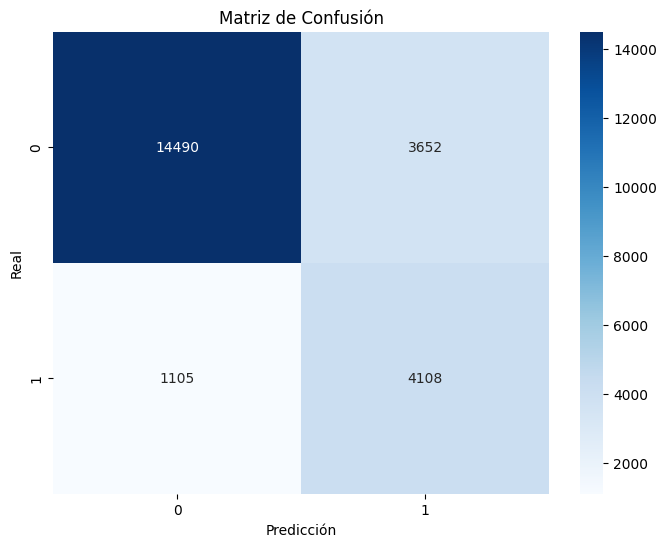

Verdaderos Negativos (TN): 14490
Falsos Positivos (FP): 3652
Falsos Negativos (FN): 1105
Verdaderos Positivos (TP): 4108


In [322]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"Verdaderos Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")
print(f"Verdaderos Positivos (TP): {tp}")

El modelo de predicción de lluvia alcanzó un total de 18598 predicciones correctas (sumando verdaderos positivos y negativos). Sin embargo, presentó una clara tendencia a la sobreestimación, evidenciada en la gran diferencia entre los errores: los falsos positivos (predicción de lluvia sin ocurrencia) ascendieron a 3652, mientras que los falsos negativos (lluvia no predicha) fueron notablemente inferiores, sumando solo 1105.

**Curva ROC**

In [323]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.7934


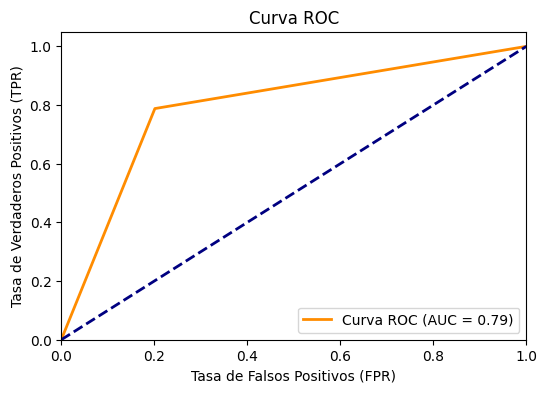

In [324]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

El modelo muestra un desempeño aceptable en la clasificación, reflejado en un Área Bajo la Curva (AUC) de 0.79. Dado que este valor se acerca más a 1.0 que a 0.5, indica que el modelo tiene una buena capacidad de distinguir entre las clases positiva y negativa. Esto implica un buen equilibrio entre la sensibilidad (identificar positivos) y la especificidad (evitar falsos positivos) en el umbral óptimo.

Sin embargo, el umbral podria mejorarse, ya que al ser de 0,5 se asume que el costo de cometer un Falso Positivo (FP) es idéntico al costo de cometer un Falso Negativo (FN), y asume que las clases están balanceadas.

Por último, se considera que si se ha conseguido un buen fitting con el modelo fijandonos en el valor AUC, pero necesita un ajuste en su calibracion y umbral para presentar mejores resultados.